In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [2]:
data_url = 'data/220511_monatszahlenmonatszahlen2204_verkehrsunfaelle (1).csv'
df = pd.read_csv(data_url)
df.head(20)

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2022,202201,NaN,16.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2022,202202,NaN,14.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2022,202203,NaN,24.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2022,202204,NaN,16.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2022,202205,NaN,24.0,NaN,NaN,NaN
5,Alkoholunfälle,insgesamt,2022,202206,NaN,48.0,NaN,NaN,NaN
6,Alkoholunfälle,insgesamt,2022,202207,NaN,44.0,NaN,NaN,NaN
7,Alkoholunfälle,insgesamt,2022,202208,NaN,46.0,NaN,NaN,NaN
8,Alkoholunfälle,insgesamt,2022,202209,NaN,54.0,NaN,NaN,NaN
9,Alkoholunfälle,insgesamt,2022,202210,NaN,43.0,NaN,NaN,NaN


In [3]:
df = df[(df.JAHR != 2021) & (df.JAHR != 2022) & (df.MONAT != 'Summe')].reset_index(drop=True)

In [4]:
col = []
for column in df['MONAT']:
    col.append(column[4:])
df['Month'] = pd.Series(col)

In [5]:
df.Month

0       01
1       02
2       03
3       04
4       05
        ..
1759    08
1760    09
1761    10
1762    11
1763    12
Name: Month, Length: 1764, dtype: object

In [6]:
df['Month'] = pd.to_numeric(df['Month'])
df.Month

0        1
1        2
2        3
3        4
4        5
        ..
1759     8
1760     9
1761    10
1762    11
1763    12
Name: Month, Length: 1764, dtype: int64

In [7]:
df = df[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'Month', 'WERT']]

In [8]:
df.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,Month,WERT
0,Alkoholunfälle,insgesamt,2020,1,28.0
1,Alkoholunfälle,insgesamt,2020,2,40.0
2,Alkoholunfälle,insgesamt,2020,3,27.0
3,Alkoholunfälle,insgesamt,2020,4,26.0
4,Alkoholunfälle,insgesamt,2020,5,40.0


In [9]:
df.isnull().sum()

MONATSZAHL     0
AUSPRAEGUNG    0
JAHR           0
Month          0
WERT           0
dtype: int64

In [10]:
df.describe()

,JAHR,Month,WERT
count,1764.000000,1764.000000,1764.000000
mean,2010.000000,6.500000,780.292517
std,6.057018,3.453031,1180.838117
min,2000.000000,1.000000,0.000000
25%,2005.000000,3.750000,38.750000
50%,2010.000000,6.500000,360.000000
75%,2015.000000,9.250000,813.250000
max,2020.000000,12.000000,4763.000000


In [11]:
target = 'WERT'

In [12]:
vars_num = [col for col in df.columns if df[col].dtypes!='O' and col!=target]

vars_cat = [col for col in df.columns if df[col].dtypes=='O']
print(f'Numerical Variables: {vars_num}')
print(f'Number of numerical variables: {len(vars_num)}\n')
print(f'Categorical Variables: {vars_cat}')
print(f'Number of categorical variables: {len(vars_cat)}')

Numerical Variables: ['JAHR', 'Month']
Number of numerical variables: 2

Categorical Variables: ['MONATSZAHL', 'AUSPRAEGUNG']
Number of categorical variables: 2


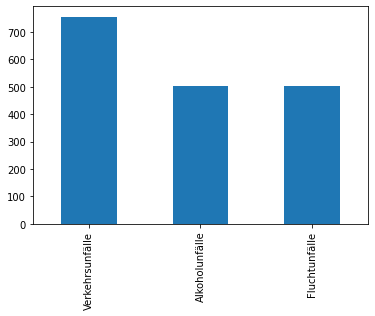

In [13]:
df.MONATSZAHL.value_counts().plot.bar()
plt.savefig('images/monatszahl_bar.png')

In [14]:
# separate into train and test set


X_train, X_test, y_train, y_test = train_test_split(
    df.drop(target, axis=1), # predictive variables
    df[target], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0,
)

X_train.shape, X_test.shape

((1587, 4), (177, 4))

In [15]:
y_train.shape, y_test.shape

((1587,), (177,))

In [16]:
for var in vars_cat:
    
    # using get_dummies from pandas to create the binary variables 
    
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[var], prefix=var, drop_first=True)
                         ], axis=1)
    
    X_test = pd.concat([X_test,
                        pd.get_dummies(X_test[var], prefix=var, drop_first=True)
                        ], axis=1)
    

X_train.drop(labels=vars_cat, axis=1, inplace=True)
X_test.drop(labels=vars_cat, axis=1, inplace=True)

X_train.shape, X_test.shape

((1587, 6), (177, 6))

In [17]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [18]:
X_train.head()

,JAHR,Month,MONATSZAHL_Fluchtunfälle,MONATSZAHL_Verkehrsunfälle,AUSPRAEGUNG_insgesamt,AUSPRAEGUNG_mit Personenschäden
0,2001,12,0,1,0,1
1,2019,4,1,0,1,0
2,2017,3,1,0,0,0
3,2011,4,1,0,1,0
4,2014,1,0,1,0,1


In [19]:
X_test.head()

,JAHR,Month,MONATSZAHL_Fluchtunfälle,MONATSZAHL_Verkehrsunfälle,AUSPRAEGUNG_insgesamt,AUSPRAEGUNG_mit Personenschäden
0,2007,2,0,1,1,0
1,2007,9,1,0,1,0
2,2007,5,0,0,0,0
3,2016,7,1,0,1,0
4,2002,11,0,1,1,0


In [20]:
features = [col for col in X_train.columns]
features

['JAHR',
 'Month',
 'MONATSZAHL_Fluchtunfälle',
 'MONATSZAHL_Verkehrsunfälle',
 'AUSPRAEGUNG_insgesamt',
 'AUSPRAEGUNG_mit Personenschäden']

In [21]:
# instantiate the model
random_forest = RandomForestRegressor(oob_score=True)

In [22]:
#train the model
random_forest.fit(X_train, y_train)

RandomForestRegressor(oob_score=True)

In [23]:
# make predictions on the test dataset first
y_pred = random_forest.predict(X_test) 

In [24]:
# check some performance metrics
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred)) 

MAE:  49.0729943502825
MSE:  9777.358751412432


In [26]:
# check the model oob score
random_forest.oob_score_

0.9891371880256715